## Imports necessarios

In [1]:
import qiskit as qs
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.circuit.library import GroverOperator, MCMT, ZGate

from qiskit.circuit import ControlledGate
import pandas as pd
from qiskit import IBMQ, Aer

from numpy import pi
# Para utilizar ferramentas matemáticas
import numpy as np

# Para utilizar simulador e hardware quântico real
from qiskit import IBMQ, Aer
from qiskit.tools.monitor import job_monitor

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram


## 6P) Se inicializarmos um qubit no estado |−⟩, qual a probabilidade de o medirmos no estado |+⟩ utilizando a base X? Crie uma função no Qiskit para realizar uma medição na base X e realize a medição do estado |0⟩ nessa base. Explique os resultados. Apresente o código e os histogramas.

Caso coloquemos o qubit no estado |−⟩ na base X, mediremos exatamente o valor |−⟩. No caso de um qubit com estado inicial |0⟩, basta aplicar uma porta hadamart para replicar o comportamento da base X. 

In [2]:

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
#circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

┌───┐┌─┐
  q: ─|0>─┤ H ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/2165673766.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


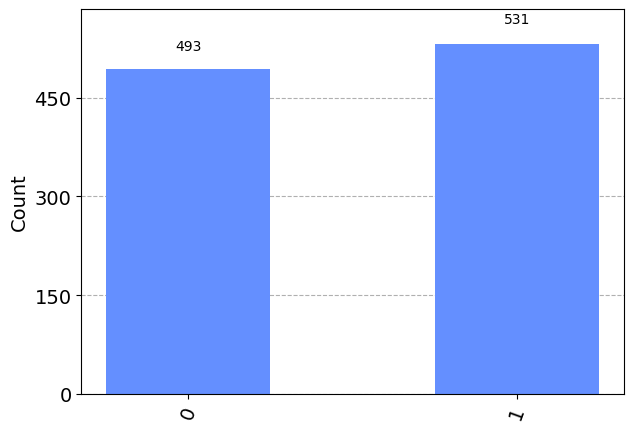

In [3]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(circuit, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

Ou seja, existem 2 possíveis estados medidos, pois o qubit está em superposicao

## 7P) Construa um circuito quântico de 3 qubits e utilize as portas quânticas necessárias para: criar uma superposição equiprovável dos 8 estados da base computacional e alterar as fases dos estados da seguinte forma: |0⟩ e |1⟩ (fase 0), |2⟩ e |3⟩ (fase 𝜋/4), |4⟩ e |5⟩ (fase 𝜋/2), |6⟩ e |7⟩ (fase 3𝜋/4). Utilize a Qsphere para facilitar a visualização dos estados e fases.


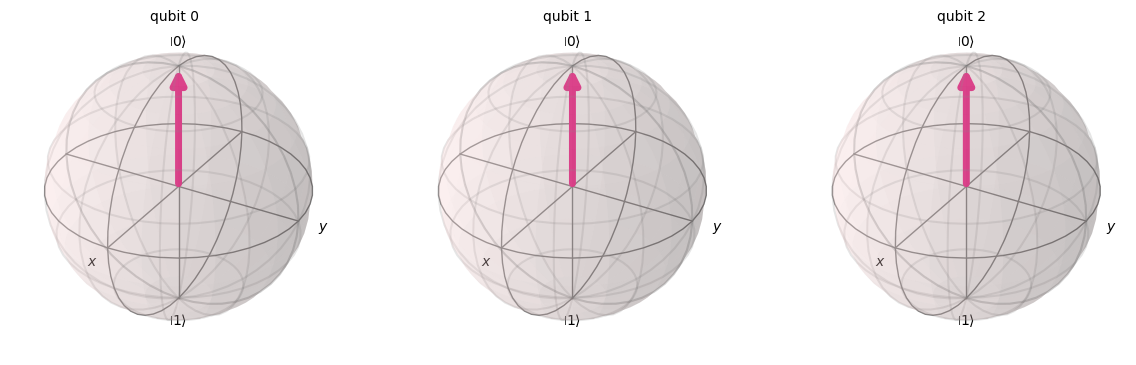

┌───┐                             ┌─┐   
q_0: ┤ H ├──■──────────────────■───────┤M├───
     ├───┤┌─┴─┐                │P(π/4) └╥┘┌─┐
q_1: ┤ H ├┤ X ├──■───■─────────■────────╫─┤M├
     ├───┤└───┘┌─┴─┐ │P(3π/4)    ┌─┐    ║ └╥┘
q_2: ┤ H ├─────┤ X ├─■───────────┤M├────╫──╫─
     └───┘     └───┘             └╥┘    ║  ║ 
c: 3/═════════════════════════════╩═════╩══╩═
                                  2     0  1

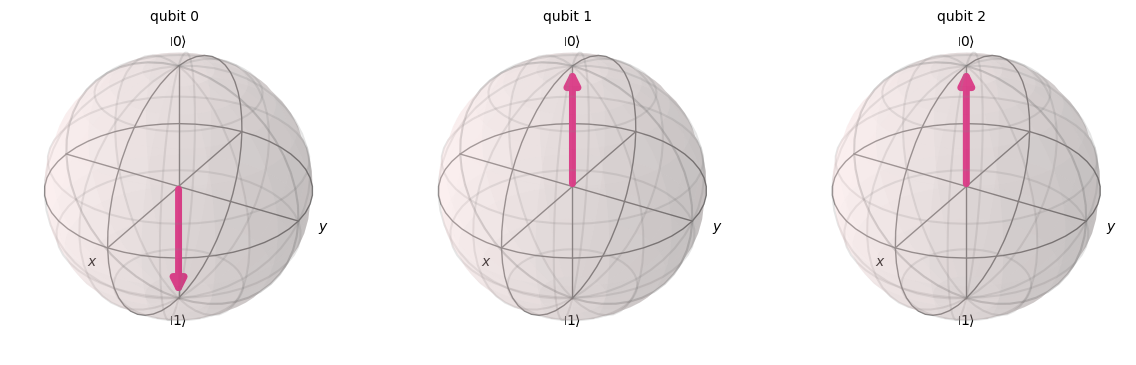

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/1218548222.py:40: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


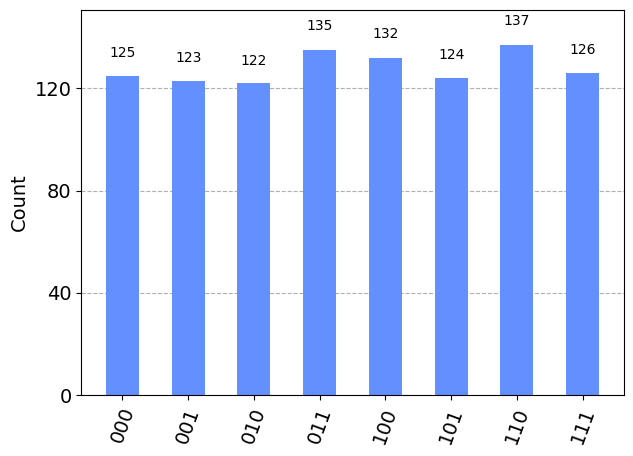

In [4]:
from qiskit.visualization import plot_bloch_multivector
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg_q,creg_c)
# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))
qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.h(qreg_q[2])

qc.cx(qreg_q[0],qreg_q[1])

qc.cx(qreg_q[1],qreg_q[2])
qc.cp(3*pi/4, 1, 2)
qc.cp(pi/4, 0, 1)

qc.measure(qreg_q[0],creg_c[0])
qc.measure(qreg_q[1],creg_c[1])
qc.measure(qreg_q[2],creg_c[2])

display(qc.draw())
#state = Statevector(circuit)
# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))
#plot_bloch_multivector(stateinit)
#plot_bloch_multivector(state)
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)


## 8P) Construa um circuito quântico de 3 qubits e utilizando os qubits q0 e q1 como controles e o qubit q2 como alvo, utilize a técnica phase kickback para rotacionar o qubit controle q0 por um ângulo 3*𝜋/2 em torno do eixo Z e o qubit controle q1 por um ângulo 3*𝜋/4 em torno do eixo Z. Apresente o diagrama de circuito e as plotagens na esfera de Bloch dos estados inicial e final.

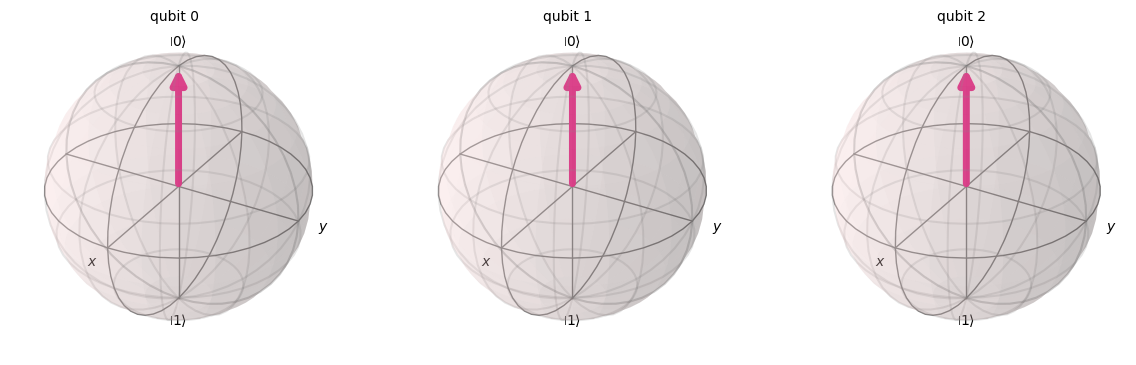

┌───┐                              
q_0: ┤ H ├─■─────────────────────────■──
     ├───┤ │P(3π/2) ┌───┐            │  
q_1: ┤ X ├─■────────┤ H ├─■──────────■──
     ├───┤          └───┘ │P(3π/4) ┌─┴─┐
q_2: ┤ X ├────────────────■────────┤ X ├
     └───┘                         └───┘
c: 3/═══════════════════════════════════

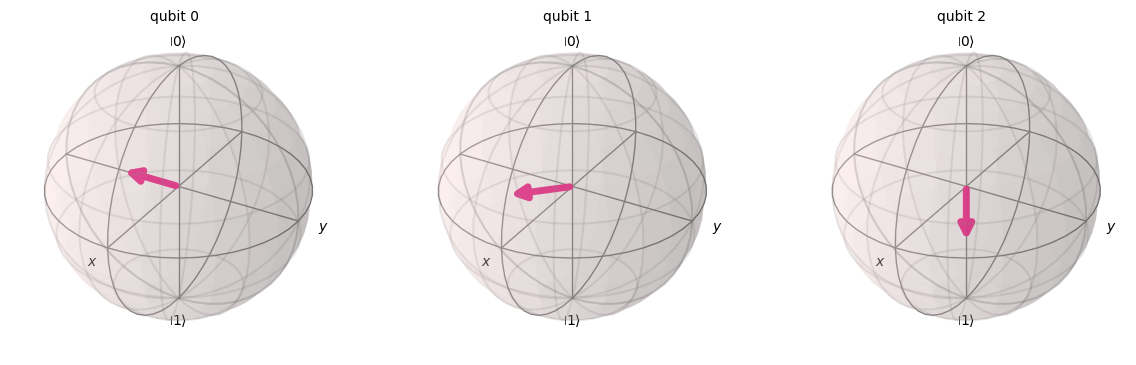

In [5]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg_q,creg_c)

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))
qc.h(qreg_q[0])
qc.x(qreg_q[1])
qc.x(qreg_q[2])
qc.cp(3*pi/2, 0, 1)
#
qc.h(qreg_q[1])

qc.cp(3*pi/4, 1, 2)

#
qc.ccx(qreg_q[0], qreg_q[1], qreg_q[2])

#qc.measure(qreg_q[0],creg_c[0])
#qc.measure(qreg_q[1],creg_c[1])
#qc.measure(qreg_q[2],creg_c[2])
display(qc.draw())

#state = Statevector(circuit)
# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))
#plot_bloch_multivector(stateinit)
#plot_bloch_multivector(state)


In [6]:
180*3/2

270.0

## 9P) Os itens abaixo são referentes aos oráculos e algoritmo de Deutsch-Jozsa. Para cada item, apresente o código, o diagrama de circuito e o resultado do simulador:

a) Conforme o método apresentado em aula, construa um oráculo de Deutsch-Jozsa com n = 5 qubits que implemente a seguinte função balanceada de 4 bits. Execute o algoritmo de Deutsch-Jozsa utilizando esse oráculo e verifique que o resultado representa de fato uma função balanceada.


In [7]:
# ORÁCULO BALANCEADO
# Número de qubits da entrada
n = 5

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
balanced_oracle = QuantumCircuit(reg_x, reg_a)

# Controla quais qubits de entrada passarão por uma porta X (little-endian)
b_str = "010"

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas CNOT
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Mostra o circuito do oráculo
balanced_oracle.draw()

x_0: ───────■──────────────────────
     ┌───┐  │       ┌───┐          
x_1: ┤ X ├──┼────■──┤ X ├──────────
     └───┘  │    │  └───┘          
x_2: ───────┼────┼────■────────────
            │    │    │            
x_3: ───────┼────┼────┼────■───────
            │    │    │    │       
x_4: ───────┼────┼────┼────┼────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
  a: ─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘└───┘

In [8]:
# ALGORITMO DEUTSCH-JOZSA (DJ)
# Encapsula os oráculos em portas quânticas
balanced_oracle_gate = balanced_oracle.to_gate()
balanced_oracle_gate.name = "Oracle"

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
creg = ClassicalRegister(n, name='c')
dj_circuit = QuantumCircuit(reg_x, reg_a, creg)

# Inclui as portas Hadamard
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Coloca o qubit ancilla no estado |->
dj_circuit.x(n)
dj_circuit.h(n)

# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Adiciona o oráculo desejado
#dj_circuit += const_oracle 
#dj_circuit += balanced_oracle

# Adiciona o oráculo desejado de forma encapsulada
#dj_circuit.append(const_oracle_gate, range(n+1))
dj_circuit.append(balanced_oracle_gate, range(n+1))

# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Repete a inclusão das portas Hadamard
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Inclui as medições
for i in range(n):
    dj_circuit.measure(i, i)
    
# Mostra o circuito do algoritmo DJ
dj_circuit.draw()

┌───┐      ░ ┌─────────┐ ░ ┌───┐ ░ ┌─┐            
x_0: ┤ H ├──────░─┤0        ├─░─┤ H ├─░─┤M├────────────
     ├───┤      ░ │         │ ░ ├───┤ ░ └╥┘┌─┐         
x_1: ┤ H ├──────░─┤1        ├─░─┤ H ├─░──╫─┤M├─────────
     ├───┤      ░ │         │ ░ ├───┤ ░  ║ └╥┘┌─┐      
x_2: ┤ H ├──────░─┤2        ├─░─┤ H ├─░──╫──╫─┤M├──────
     ├───┤      ░ │  Oracle │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐   
x_3: ┤ H ├──────░─┤3        ├─░─┤ H ├─░──╫──╫──╫─┤M├───
     ├───┤      ░ │         │ ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐
x_4: ┤ H ├──────░─┤4        ├─░─┤ H ├─░──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ │         │ ░ └───┘ ░  ║  ║  ║  ║ └╥┘
  a: ┤ X ├┤ H ├─░─┤5        ├─░───────░──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └─────────┘ ░       ░  ║  ║  ║  ║  ║ 
c: 5/════════════════════════════════════╩══╩══╩══╩══╩═
                                         0  1  2  3  4

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/3254517452.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


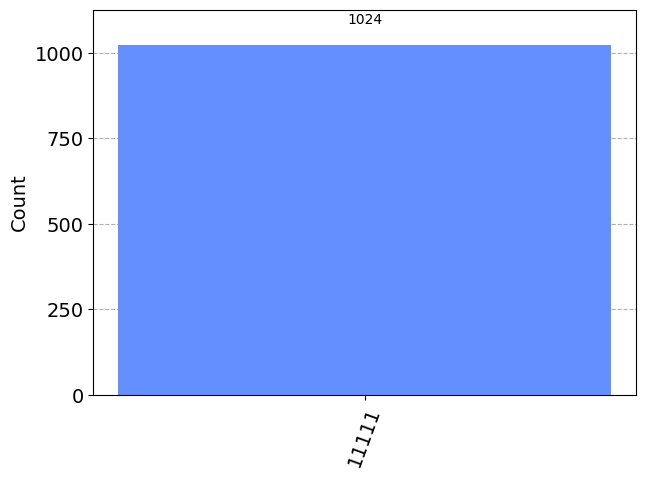

In [9]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

b) Construa um oráculo de Deutsch-Jozsa com n = 4 qubits que implemente uma função balanceada de 3 bits utilizando apenas portas CCX. Execute o algoritmo de Deutsch-Jozsa utilizando esse oráculo e verifique que o resultado representa de fato uma função balanceada.

In [10]:
# ORÁCULO BALANCEADO
# Número de qubits da entrada
n = 4

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
balanced_oracle = QuantumCircuit(reg_x, reg_a)

# Controla quais qubits de entrada passarão por uma porta X (little-endian)
b_str = "010"

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas CNOT
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Mostra o circuito do oráculo
balanced_oracle.draw()

x_0: ───────■─────────────────
     ┌───┐  │       ┌───┐     
x_1: ┤ X ├──┼────■──┤ X ├─────
     └───┘  │    │  └───┘     
x_2: ───────┼────┼────■───────
            │    │    │       
x_3: ───────┼────┼────┼────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
  a: ─────┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘

c) A função dj_problem_oracle apresentada no trecho de código abaixo retorna um oráculo de Deutsch-Jozsa como uma porta quântica. Essa porta recebe 5 qubits de entrada onde o qubit q4 representa o qubit de saída. A função é parametrizada com um valor inteiro de 1 a 4, fornecendo quatro oráculos distintos. Utilize o algoritmo de Deutsch-Jozsa para decidir para cada oráculo se ele é constante ou balanceado.

In [11]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(2) # valores possíveis: {1, 2, 3, 4}
oracle.num_qubits

5

In [12]:
def circuito_c():
    # ALGORITMO DEUTSCH-JOZSA (DJ)
    # Encapsula os oráculos em portas quânticas

    # Cria o circuito quântico
    reg_x = QuantumRegister(n, name='x')
    reg_a = QuantumRegister(1, name='a')
    creg = ClassicalRegister(n, name='c')
    dj_circuit = QuantumCircuit(reg_x, reg_a, creg)

    # Inclui as portas Hadamard
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # Coloca o qubit ancilla no estado |->
    dj_circuit.x(n)
    dj_circuit.h(n)

    # Inclui uma barra para facilitar a visualização do circuito
    dj_circuit.barrier()

    # Adiciona o oráculo desejado
    #dj_circuit += const_oracle 
    #dj_circuit += balanced_oracle

    # Adiciona o oráculo desejado de forma encapsulada
    #dj_circuit.append(const_oracle_gate, range(n+1))
    dj_circuit.append(oracle, range(n+1))

    # Inclui uma barra para facilitar a visualização do circuito
    dj_circuit.barrier()

    # Repete a inclusão das portas Hadamard
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # Inclui uma barra para facilitar a visualização do circuito
    dj_circuit.barrier()

    # Inclui as medições
    for i in range(n):
        dj_circuit.measure(i, i)
        
    # Mostra o circuito do algoritmo DJ
    dj_circuit.draw()
    # Excecuta em um simulador
    aer_sim = Aer.get_backend('aer_simulator')
    t_dj_circuit = transpile(dj_circuit, aer_sim)
    qobj = assemble(t_dj_circuit, aer_sim)

    # Obtém os resultados
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    # Mostra os resultados
    display(plot_histogram(answer))

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/4192934620.py:52: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


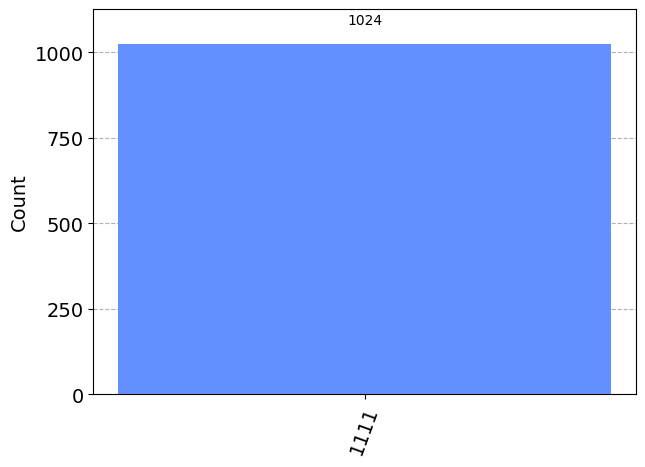

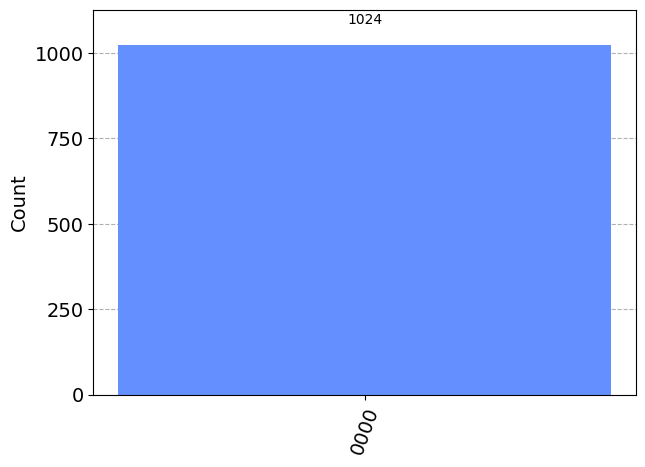

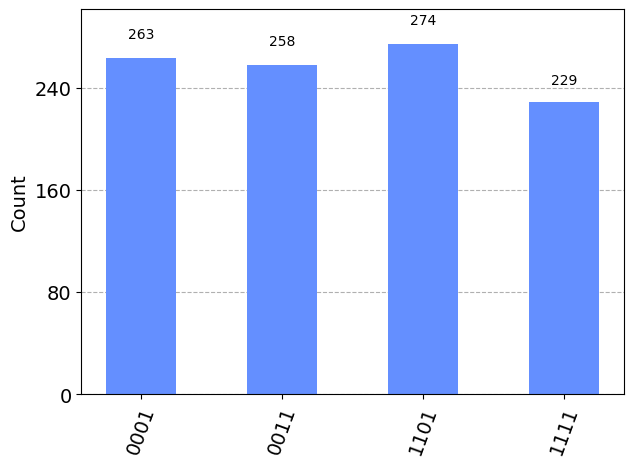

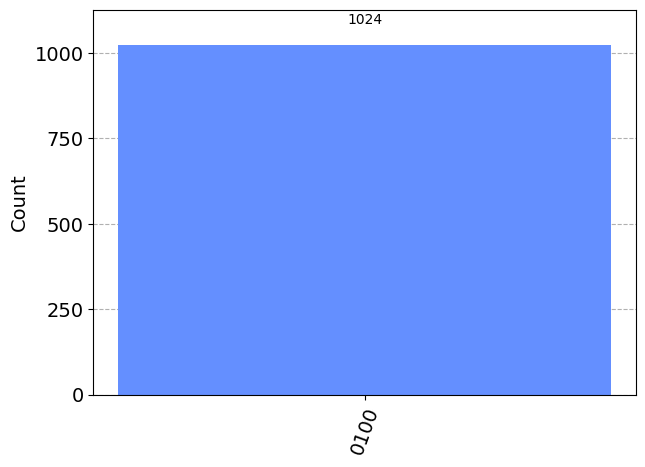

In [13]:
for i in range(1,5):
    oracle = dj_problem_oracle(i) # valores possíveis: {1, 2, 3, 4}
    circuito_c()


Ou seja, apenas para i=2 o oraculo eh constante

## 10P) Os itens abaixo são referentes aos oráculos e algoritmo de Bernstein-Vazirani. Para cada item, apresente o código, o diagrama de circuito e o resultado do simulador:

a) Construa o algoritmo de Bernstein-Vazirani utilizando o oráculo dado pelo circuito abaixo (você vai precisar implementar o oráculo da imagem) para descobrir a string secreta utilizada.

In [14]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para visualização com estilo MATBLAB
import matplotlib.pyplot as plt

# Para utilizar simulador e hardware quântico real
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Número de qubits para representar a string binária s
n = 10

# String binária s usada para construir o oraculo.
s = '11001010011'   

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
creg = ClassicalRegister(n, name='c')
bv_circuit = QuantumCircuit(reg_x, reg_a, creg)

# Inclui as portas Hadamard antes de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Coloca o qubit ancilla no estado |->
bv_circuit.x(n)
bv_circuit.h(n)

# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Constrói o oráculo
# Se o qubit de s que está sendo analisado for 0, adiciona uma porta identidade
# Se for 1, adiciona porta CNOT com qubit ancilla como alvo
for q in range(n):
    if s[q] == '0' :
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)

# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Inclui as portas Hadamard depois de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Inclui as medições (n-1-i para realizar a ordenação little-endian no histograma)
for i in range(n):
    bv_circuit.measure(i, n-1-i)

# Mostra o circuito do algoritmo BV
bv_circuit.draw()

/Users/leonardocipriani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


┌───┐      ░                                ░ ┌───┐┌─┐                  »
 x_0: ┤ H ├──────░───■────────────────────────────░─┤ H ├┤M├──────────────────»
      ├───┤      ░   │                            ░ ├───┤└╥┘┌─┐               »
 x_1: ┤ H ├──────░───┼─────────■──────────────────░─┤ H ├─╫─┤M├───────────────»
      ├───┤      ░   │  ┌───┐  │                  ░ ├───┤ ║ └╥┘┌─┐            »
 x_2: ┤ H ├──────░───┼──┤ I ├──┼──────────────────░─┤ H ├─╫──╫─┤M├────────────»
      ├───┤      ░   │  ├───┤  │                  ░ ├───┤ ║  ║ └╥┘┌─┐         »
 x_3: ┤ H ├──────░───┼──┤ I ├──┼──────────────────░─┤ H ├─╫──╫──╫─┤M├─────────»
      ├───┤      ░   │  └───┘  │                  ░ ├───┤ ║  ║  ║ └╥┘┌─┐      »
 x_4: ┤ H ├──────░───┼─────────┼────■─────────────░─┤ H ├─╫──╫──╫──╫─┤M├──────»
      ├───┤      ░   │  ┌───┐  │    │             ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐   »
 x_5: ┤ H ├──────░───┼──┤ I ├──┼────┼─────────────░─┤ H ├─╫──╫──╫──╫──╫─┤M├───»
      ├───┤      ░   │  └───┘  │    │             ░ ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐»
 x_6: ┤ H ├──────░───┼─────────┼────┼────■────────░─┤ H ├─╫──╫──╫──╫──╫──╫─┤M├»
      ├───┤      ░   │  ┌───┐  │    │    │        ░ ├───┤ ║  ║  ║  ║  ║  ║ └╥┘»
 x_7: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────────░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  ├───┤  │    │    │        ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
 x_8: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────────░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  └───┘  │    │    │        ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
 x_9: ┤ H ├──────░───┼─────────┼────┼────┼────■───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤┌───┐ ░ ┌─┴─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║  ║  ║  ║ »
   a: ┤ X ├┤ H ├─░─┤ X ├─────┤ X ├┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫──╫──╫─»
      └───┘└───┘ ░ └───┘     └───┘└───┘└───┘└───┘ ░       ║  ║  ║  ║  ║  ║  ║ »
c: 10/════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═»
                                                          9  8  7  6  5  4  3 »
«               
« x_0: ─────────
«               
« x_1: ─────────
«               
« x_2: ─────────
«               
« x_3: ─────────
«               
« x_4: ─────────
«               
« x_5: ─────────
«               
« x_6: ─────────
«      ┌─┐      
« x_7: ┤M├──────
«      └╥┘┌─┐   
« x_8: ─╫─┤M├───
«       ║ └╥┘┌─┐
« x_9: ─╫──╫─┤M├
«       ║  ║ └╥┘
«   a: ─╫──╫──╫─
«       ║  ║  ║ 
«c: 10/═╩══╩══╩═
«       2  1  0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/2614624168.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


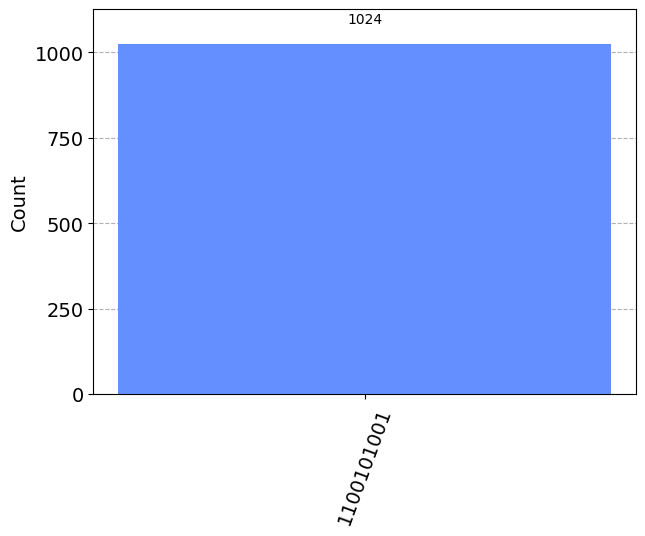

In [15]:
from qiskit.visualization import plot_histogram
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(bv_circuit)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

b) Dada a função f(x) de 5 bits de entrada avaliada para 5 entradas distintas indicadas abaixo, construa o oráculo de Bernstein-Vazirani, execute o algoritmo e mostre que o resultado encontrado de fato corresponde à string secreta utilizada no oráculo.
f(01000) = 1, f(01100) = 0, f(10010) = 0, f(10011) = 1, f(11101) = 1

In [16]:

# Para utilizar ferramentas matemáticas
import numpy as np

# Para visualização com estilo MATBLAB
import matplotlib.pyplot as plt

# Para utilizar simulador e hardware quântico real
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Número de qubits para representar a string binária s
n = 5

# String binária s usada para construir o oraculo.
s = '11001'   

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
creg = ClassicalRegister(n, name='c')
bv_circuit = QuantumCircuit(reg_x, reg_a, creg)

# Inclui as portas Hadamard antes de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Coloca o qubit ancilla no estado |->
bv_circuit.x(n)
bv_circuit.h(n)

# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Constrói o oráculo
# Se o qubit de s que está sendo analisado for 0, adiciona uma porta identidade
# Se for 1, adiciona porta CNOT com qubit ancilla como alvo
for q in range(n):
    if s[q] == '0' :
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)

# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Inclui as portas Hadamard depois de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Inclui as medições (n-1-i para realizar a ordenação little-endian no histograma)
for i in range(n):
    bv_circuit.measure(i, n-1-i)

# Mostra o circuito do algoritmo BV
bv_circuit.draw()

┌───┐      ░                      ░ ┌───┐┌─┐            
x_0: ┤ H ├──────░───■──────────────────░─┤ H ├┤M├────────────
     ├───┤      ░   │                  ░ ├───┤└╥┘┌─┐         
x_1: ┤ H ├──────░───┼─────────■────────░─┤ H ├─╫─┤M├─────────
     ├───┤      ░   │  ┌───┐  │        ░ ├───┤ ║ └╥┘┌─┐      
x_2: ┤ H ├──────░───┼──┤ I ├──┼────────░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░   │  ├───┤  │        ░ ├───┤ ║  ║ └╥┘┌─┐   
x_3: ┤ H ├──────░───┼──┤ I ├──┼────────░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░   │  └───┘  │        ░ ├───┤ ║  ║  ║ └╥┘┌─┐
x_4: ┤ H ├──────░───┼─────────┼────■───░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐     ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║ └╥┘
  a: ┤ X ├┤ H ├─░─┤ X ├─────┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘└───┘ ░       ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
                                               4  3  2  1  0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/2614624168.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


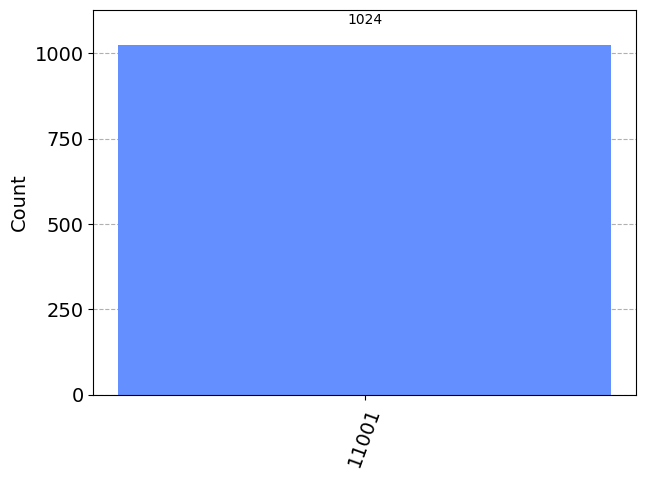

In [17]:
from qiskit.visualization import plot_histogram
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(bv_circuit)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

## 11P) Os itens abaixo são referentes aos oráculos e algoritmo de Simon. Para cada item, apresente o código, o diagrama de circuito e o resultado do simulador:

a) Para os oráculos apresentados abaixo, indique qual a cadeia de bits b utilizada e reconstrua o circuito no Qiskit para esse oráculo e para o algoritmo de Simon.

Para o primeiro oraculo, cadeia de bits utilizada b: 1100110101



In [18]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para utilizar simulador e hardware quântico real
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, assemble, transpile

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Oráculo de Simon
def simon_oracle(b):
    n = len(b)
    oracle_qc = QuantumCircuit(2 * n,n)
    
    
    return oracle_qc

# String secreta
b = '1100110101'

# Faz b seguir a ordenação de bits do Qiskit
b = b[::-1] 
print(len(b))
# Número de qubits dos registradores
n = len(b)
print(range(n))
# Cria o circuito quântico
simon_circuit = QuantumCircuit(n * 2, n)
# Aplica Hadamard ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()


# Copia o 1o registrador no 2o registrador
for i in range(n):
    simon_circuit.cx(i, i + n)
    
    # Encontra o índice menos significativo e inclui as portas CNOT necessárias
for i in range (n):
    if (b[i] == '1'):
        simon_circuit.cx(i, i+n)
            

# Inclui o oráculo de Simon
#simon_circuit = simon_oracle(b)

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Aplica Hadamard novamente ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Realiza a medição
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

10
range(0, 10)


┌───┐ ░                                                                  »
 q_0: ┤ H ├─░───■─────────────────────────────────────────────────■────────────»
      ├───┤ ░   │                                                 │            »
 q_1: ┤ H ├─░───┼────■────────────────────────────────────────────┼────────────»
      ├───┤ ░   │    │                                            │            »
 q_2: ┤ H ├─░───┼────┼────■───────────────────────────────────────┼────■───────»
      ├───┤ ░   │    │    │                                       │    │       »
 q_3: ┤ H ├─░───┼────┼────┼────■──────────────────────────────────┼────┼───────»
      ├───┤ ░   │    │    │    │                                  │    │       »
 q_4: ┤ H ├─░───┼────┼────┼────┼────■─────────────────────────────┼────┼────■──»
      ├───┤ ░   │    │    │    │    │                             │    │    │  »
 q_5: ┤ H ├─░───┼────┼────┼────┼────┼────■────────────────────────┼────┼────┼──»
      ├───┤ ░   │    │    │    │    │    │                        │    │    │  »
 q_6: ┤ H ├─░───┼────┼────┼────┼────┼────┼────■───────────────────┼────┼────┼──»
      ├───┤ ░   │    │    │    │    │    │    │                   │    │    │  »
 q_7: ┤ H ├─░───┼────┼────┼────┼────┼────┼────┼────■──────────────┼────┼────┼──»
      ├───┤ ░   │    │    │    │    │    │    │    │              │    │    │  »
 q_8: ┤ H ├─░───┼────┼────┼────┼────┼────┼────┼────┼────■─────────┼────┼────┼──»
      ├───┤ ░   │    │    │    │    │    │    │    │    │         │    │    │  »
 q_9: ┤ H ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────■────┼────┼────┼──»
      └───┘ ░ ┌─┴─┐  │    │    │    │    │    │    │    │    │  ┌─┴─┐  │    │  »
q_10: ──────░─┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼──»
            ░ └───┘┌─┴─┐  │    │    │    │    │    │    │    │  └───┘  │    │  »
q_11: ──────░──────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼─────────┼────┼──»
            ░      └───┘┌─┴─┐  │    │    │    │    │    │    │       ┌─┴─┐  │  »
q_12: ──────░───────────┤ X ├──┼────┼────┼────┼────┼────┼────┼───────┤ X ├──┼──»
            ░           └───┘┌─┴─┐  │    │    │    │    │    │       └───┘  │  »
q_13: ──────░────────────────┤ X ├──┼────┼────┼────┼────┼────┼──────────────┼──»
            ░                └───┘┌─┴─┐  │    │    │    │    │            ┌─┴─┐»
q_14: ──────░─────────────────────┤ X ├──┼────┼────┼────┼────┼────────────┤ X ├»
            ░                     └───┘┌─┴─┐  │    │    │    │            └───┘»
q_15: ──────░──────────────────────────┤ X ├──┼────┼────┼────┼─────────────────»
            ░                          └───┘┌─┴─┐  │    │    │                 »
q_16: ──────░───────────────────────────────┤ X ├──┼────┼────┼─────────────────»
            ░                               └───┘┌─┴─┐  │    │                 »
q_17: ──────░────────────────────────────────────┤ X ├──┼────┼─────────────────»
            ░                                    └───┘┌─┴─┐  │                 »
q_18: ──────░─────────────────────────────────────────┤ X ├──┼─────────────────»
            ░                                         └───┘┌─┴─┐               »
q_19: ──────░──────────────────────────────────────────────┤ X ├───────────────»
            ░                                              └───┘               »
c: 10/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                      ░ ┌───┐ ░ ┌─┐                           
« q_0: ────────────────░─┤ H ├─░─┤M├───────────────────────────
«                      ░ ├───┤ ░ └╥┘┌─┐                        
« q_1: ────────────────░─┤ H ├─░──╫─┤M├────────────────────────
«                      ░ ├───┤ ░  ║ └╥┘┌─┐                     
« q_2: ────────────────░─┤ H ├─░──╫──╫─┤M├─────────────────────
«                      ░ ├───┤ ░  ║  ║ └╥┘┌─┐                  
« q_3: ────────────────░─┤ H ├─░──╫──╫──╫─┤M├──────────────────
«          

Para o segundo oraculo, a cadeia de bits b utilizada e: 00011011

In [19]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para utilizar simulador e hardware quântico real
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, assemble, transpile

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Oráculo de Simon
def simon_oracle(b):
    n = len(b)
    oracle_qc = QuantumCircuit(2 * n,n)
    
    
    return oracle_qc

# String secreta
b = '00011011'

# Faz b seguir a ordenação de bits do Qiskit
b = b[::-1] 
print(len(b))
# Número de qubits dos registradores
n = len(b)
print(range(n))
# Cria o circuito quântico
simon_circuit = QuantumCircuit(n * 2, n)
# Aplica Hadamard ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()


# Copia o 1o registrador no 2o registrador
for i in range(n):
    simon_circuit.cx(i, i + n)
    
    # Encontra o índice menos significativo e inclui as portas CNOT necessárias
for i in range (n):
    if (b[i] == '1'):
        simon_circuit.cx(i, i+n)
            

# Inclui o oráculo de Simon
#simon_circuit = simon_oracle(b)

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Aplica Hadamard novamente ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Realiza a medição
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

8
range(0, 8)


┌───┐ ░                                                              ░ »
 q_0: ┤ H ├─░───■───────────────────────────────────────■──────────────────░─»
      ├───┤ ░   │                                       │                  ░ »
 q_1: ┤ H ├─░───┼────■──────────────────────────────────┼────■─────────────░─»
      ├───┤ ░   │    │                                  │    │             ░ »
 q_2: ┤ H ├─░───┼────┼────■─────────────────────────────┼────┼─────────────░─»
      ├───┤ ░   │    │    │                             │    │             ░ »
 q_3: ┤ H ├─░───┼────┼────┼────■────────────────────────┼────┼────■────────░─»
      ├───┤ ░   │    │    │    │                        │    │    │        ░ »
 q_4: ┤ H ├─░───┼────┼────┼────┼────■───────────────────┼────┼────┼────■───░─»
      ├───┤ ░   │    │    │    │    │                   │    │    │    │   ░ »
 q_5: ┤ H ├─░───┼────┼────┼────┼────┼────■──────────────┼────┼────┼────┼───░─»
      ├───┤ ░   │    │    │    │    │    │              │    │    │    │   ░ »
 q_6: ┤ H ├─░───┼────┼────┼────┼────┼────┼────■─────────┼────┼────┼────┼───░─»
      ├───┤ ░   │    │    │    │    │    │    │         │    │    │    │   ░ »
 q_7: ┤ H ├─░───┼────┼────┼────┼────┼────┼────┼────■────┼────┼────┼────┼───░─»
      └───┘ ░ ┌─┴─┐  │    │    │    │    │    │    │  ┌─┴─┐  │    │    │   ░ »
 q_8: ──────░─┤ X ├──┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼────┼───░─»
            ░ └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐  │    │   ░ »
 q_9: ──────░──────┤ X ├──┼────┼────┼────┼────┼────┼───────┤ X ├──┼────┼───░─»
            ░      └───┘┌─┴─┐  │    │    │    │    │       └───┘  │    │   ░ »
q_10: ──────░───────────┤ X ├──┼────┼────┼────┼────┼──────────────┼────┼───░─»
            ░           └───┘┌─┴─┐  │    │    │    │            ┌─┴─┐  │   ░ »
q_11: ──────░────────────────┤ X ├──┼────┼────┼────┼────────────┤ X ├──┼───░─»
            ░                └───┘┌─┴─┐  │    │    │            └───┘┌─┴─┐ ░ »
q_12: ──────░─────────────────────┤ X ├──┼────┼────┼─────────────────┤ X ├─░─»
            ░                     └───┘┌─┴─┐  │    │                 └───┘ ░ »
q_13: ──────░──────────────────────────┤ X ├──┼────┼───────────────────────░─»
            ░                          └───┘┌─┴─┐  │                       ░ »
q_14: ──────░───────────────────────────────┤ X ├──┼───────────────────────░─»
            ░                               └───┘┌─┴─┐                     ░ »
q_15: ──────░────────────────────────────────────┤ X ├─────────────────────░─»
            ░                                    └───┘                     ░ »
 c: 8/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌───┐ ░ ┌─┐                     
« q_0: ┤ H ├─░─┤M├─────────────────────
«      ├───┤ ░ └╥┘┌─┐                  
« q_1: ┤ H ├─░──╫─┤M├──────────────────
«      ├───┤ ░  ║ └╥┘┌─┐               
« q_2: ┤ H ├─░──╫──╫─┤M├───────────────
«      ├───┤ ░  ║  ║ └╥┘┌─┐            
« q_3: ┤ H ├─░──╫──╫──╫─┤M├────────────
«      ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
« q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├─────────
«      ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐      
« q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────
«      ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
« q_6: ┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
«      ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
« q_7: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
«      └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
« q_8: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
« q_9: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«q_10: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«q_11: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«q_12: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«q_13: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«q_14: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─
«            ░  ║  ║  ║  ║  ║  ║  ║  ║ 
«

b) Dada a cadeia de bits ‘1011’ (representação big-endian), construa os circuitos para o oráculo e o algoritmo de Simon e a partir dos resultados de simulação, mostre que de fato é possível encontrar a cadeia de bits ‘1011’.

In [20]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para utilizar simulador e hardware quântico real
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, assemble, transpile

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Oráculo de Simon
def simon_oracle(b):
    n = len(b)
    oracle_qc = QuantumCircuit(2 * n,n)
    
    
    return oracle_qc

# String secreta
b ='1101'

# Faz b seguir a ordenação de bits do Qiskit
b = b[::-1] 
print(len(b))
# Número de qubits dos registradores
n = len(b)
print(range(n))
# Cria o circuito quântico
simon_circuit = QuantumCircuit(n * 2, n)
# Aplica Hadamard ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()


# Copia o 1o registrador no 2o registrador
for i in range(n):
    simon_circuit.cx(i, i + n)
    
    # Encontra o índice menos significativo e inclui as portas CNOT necessárias
for i in range (n):
    if (b[i] == '1'):
        simon_circuit.cx(0, i+n)
            

# Inclui o oráculo de Simon
#simon_circuit = simon_oracle(b)

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Aplica Hadamard novamente ao 1o registrador
simon_circuit.h(range(n))

# Inclui uma barra para facilitar a visualização do circuito
simon_circuit.barrier()

# Realiza a medição
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

4
range(0, 4)


┌───┐ ░                                     ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├─░───■───────────────────■────■────■───░─┤ H ├─░─┤M├─────────
     ├───┤ ░   │                   │    │    │   ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├─░───┼────■──────────────┼────┼────┼───░─┤ H ├─░──╫─┤M├──────
     ├───┤ ░   │    │              │    │    │   ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■─────────┼────┼────┼───░─┤ H ├─░──╫──╫─┤M├───
     ├───┤ ░   │    │    │         │    │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■────┼────┼────┼───░─┤ H ├─░──╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │  ┌─┴─┐  │    │   ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼──┤ X ├──┼────┼───░───────░──╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │  └───┘  │    │   ░       ░  ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼─────────┼────┼───░───────░──╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │       ┌─┴─┐  │   ░       ░  ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼───────┤ X ├──┼───░───────░──╫──╫──╫──╫─
           ░           └───┘┌─┴─┐     └───┘┌─┴─┐ ░       ░  ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├──────────┤ X ├─░───────░──╫──╫──╫──╫─
           ░                └───┘          └───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════════════╩══╩══╩══╩═
                                                            0  1  2  3

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/678314940.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


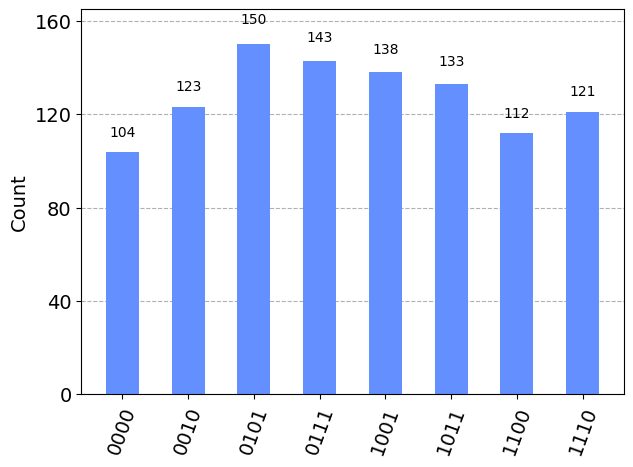

In [21]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(simon_circuit)

# Obtém os resultados
results = aer_sim.run(qobj).result()
counts = results.get_counts()

# Mostra os resultados
plot_histogram(counts)

e possivel verificar que o valor 1011 aparece como um possivel valor de saida do sistema. 


## 12P) Implemente o algoritmo de Grover para N = 3 qubits com dois estados marcados para os casos dos itens a e b:

a) |101⟩ e |011⟩

In [22]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

In [23]:
marked_states = ["101", "011"]

oracle = grover_oracle(marked_states)
oracle.draw()

q_0: ──────■───────■──────
     ┌───┐ │ ┌───┐ │      
q_1: ┤ X ├─■─┤ X ├─■──────
     └───┘ │ ├───┤ │ ┌───┐
q_2: ──────■─┤ X ├─■─┤ X ├
             └───┘   └───┘

In [24]:
import math
grover_op = GroverOperator(oracle)
grover_op.decompose().draw("mpl")
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/230403493.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


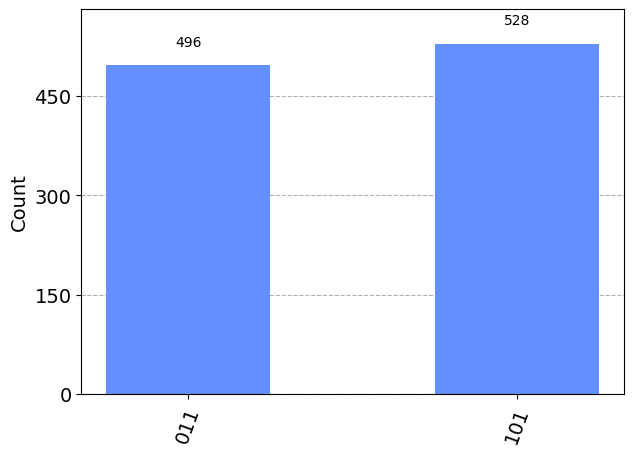

In [25]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

b) |010⟩ e |100⟩

In [26]:
marked_states = ["010", "100"]

oracle = grover_oracle(marked_states)
oracle.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├
     └───┘ │ ├───┤└───┘ │ ├───┤
q_1: ──────■─┤ X ├──────■─┤ X ├
     ┌───┐ │ ├───┤      │ └───┘
q_2: ┤ X ├─■─┤ X ├──────■──────
     └───┘   └───┘

In [27]:
import math
grover_op = GroverOperator(oracle)
grover_op.decompose().draw("mpl")
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw()


┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/230403493.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


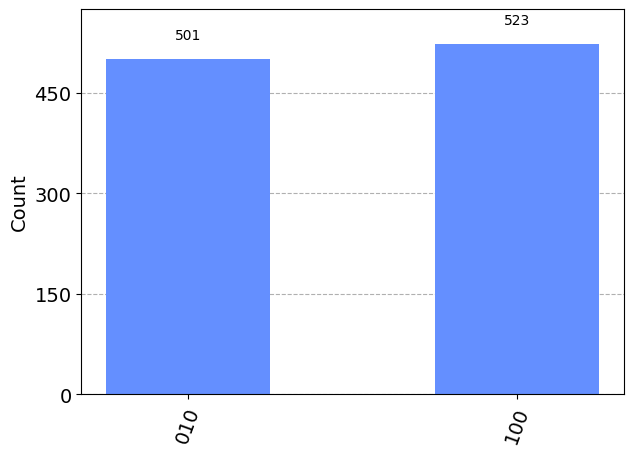

In [28]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

c) Construa um difusor generalizado para N qubits. Implemente o algoritmo de Grover
utilizando esse difusor para N = 4 qubits com estados marcados |0111⟩ e |1010⟩.

In [29]:
marked_states = ["0111", "1010"]

oracle = grover_oracle(marked_states)
oracle.draw()

┌───┐   ┌───┐
q_0: ──────■─┤ X ├─■─┤ X ├
           │ └───┘ │ └───┘
q_1: ──────■───────■──────
           │ ┌───┐ │ ┌───┐
q_2: ──────■─┤ X ├─■─┤ X ├
     ┌───┐ │ ├───┤ │ └───┘
q_3: ┤ X ├─■─┤ X ├─■──────
     └───┘   └───┘

In [30]:
import math
grover_op = GroverOperator(oracle)
grover_op.decompose().draw("mpl")
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw()


┌───┐┌────┐┌────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├─────────
        ├───┤│    ││    │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1   ├┤1   ├─░──╫─┤M├──────
        ├───┤│  Q ││  Q │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2   ├┤2   ├─░──╫──╫─┤M├───
        ├───┤│    ││    │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════╩══╩══╩══╩═
                             0  1  2  3

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/230403493.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


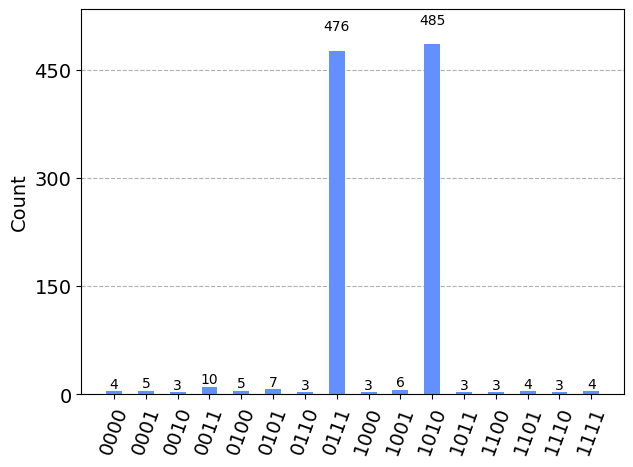

In [31]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

## 13P) A função grover_problem_oracle recebe um número de qubits n e uma variável variant que modifica quantos e quais estados serão marcados, retornando o respectivo oráculo de n qubits. Esses estados marcados podem ser visualizados através do parâmetro print_solutions.

In [32]:
from qiskit_textbook.problems import grover_problem_oracle
## Exemplo de Uso
n = 4
oracle = grover_problem_oracle(n, variant=7,
print_solutions=True) # variante do oráculo com n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()


Solutions:
|0111>


┌────────────────────┐
q_0: ┤0                   ├
     │                    │
q_1: ┤1                   ├
     │  Oracle
n=4, var=7 │
q_2: ┤2                   ├
     │                    │
q_3: ┤3                   ├
     └────────────────────┘

a) Para o caso n = 4 qubits e variant = 7, temos 1 estado marcado. Quantas iterações
são necessárias para obtermos uma probabilidade de medição maior que 95% para esse estado? Implemente o algoritmo de Grover para esse oráculo e encontre a solução para esse cenário. O que acontece com as probabilidades de medição
conforme aumentamos o número de iterações? Explique.

In [33]:
import math
grover_op = GroverOperator(qc)
grover_op.decompose().draw("mpl")
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw()

┌───┐┌────┐┌────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├─────────
        ├───┤│    ││    │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1   ├┤1   ├─░──╫─┤M├──────
        ├───┤│  Q ││  Q │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2   ├┤2   ├─░──╫──╫─┤M├───
        ├───┤│    ││    │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════╩══╩══╩══╩═
                             0  1  2  3

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/665798834.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj, shots=shots).result()


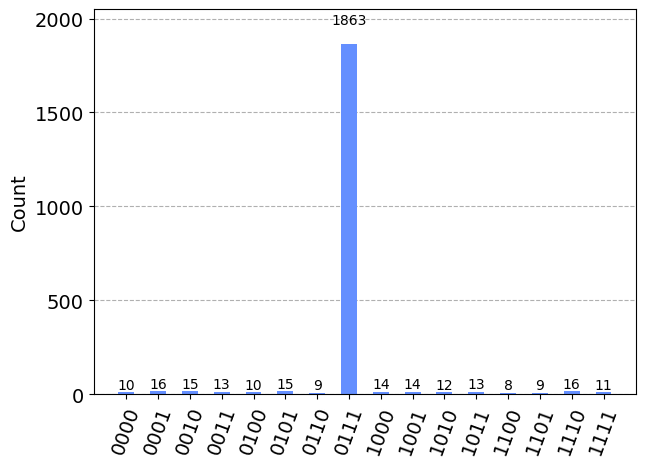

In [34]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)
# Obtém os resultados
shots=2048
results = aer_sim.run(qobj, shots=shots).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

b) Se tivermos 4 qubits e 2 estados marcados (n = 4, variant = 1), quantas iterações
precisamos para obtermos uma probabilidade superior a 90% de medir uma solução?

In [35]:
from qiskit_textbook.problems import grover_problem_oracle
## Exemplo de Uso
n = 4
oracle = grover_problem_oracle(n, variant=1,
print_solutions=True) # variante do oráculo com n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()

Solutions:
|0111>
|1001>


┌────────────────────┐
q_0: ┤0                   ├
     │                    │
q_1: ┤1                   ├
     │  Oracle
n=4, var=1 │
q_2: ┤2                   ├
     │                    │
q_3: ┤3                   ├
     └────────────────────┘

In [36]:
import math
grover_op = GroverOperator(qc)
grover_op.decompose().draw("mpl")
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw()

┌───┐┌────┐┌────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├─────────
        ├───┤│    ││    │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1   ├┤1   ├─░──╫─┤M├──────
        ├───┤│  Q ││  Q │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2   ├┤2   ├─░──╫──╫─┤M├───
        ├───┤│    ││    │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════╩══╩══╩══╩═
                             0  1  2  3

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/665798834.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj, shots=shots).result()


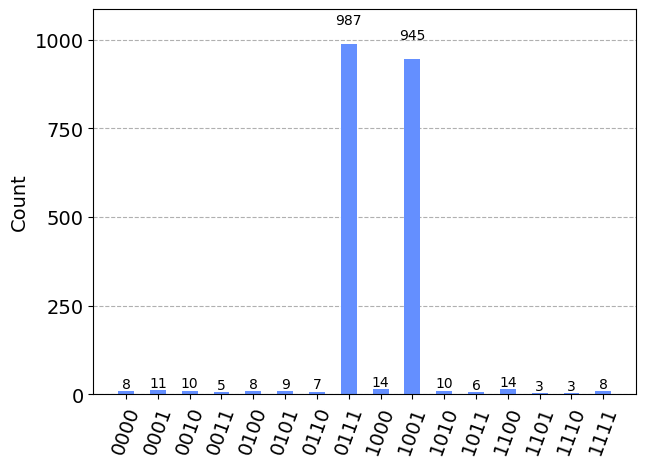

In [37]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)
# Obtém os resultados
shots=2048
results = aer_sim.run(qobj, shots=shots).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

c) Crie uma função que receba como parâmetros um oráculo de Grover e um número
de iterações, e que retorna um circuito quântico que realiza o algoritmo de Grover
utilizando esse oráculo com o número de iterações estabelecido. Teste com o oráculo
(n = 5, variant = 3).

In [38]:
def groover_iter(oraculo, iteracoes):
    grover_op = GroverOperator(oraculo)
    grover_op.decompose().draw("mpl")
    qc = QuantumCircuit(grover_op.num_qubits)
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(iteracoes), inplace=True)
    # Measure all qubits
    qc.measure_all()
    display(qc.draw())

In [39]:
n = 5
oracle = grover_problem_oracle(n, variant=3,
print_solutions=True) # variante do oráculo com n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3,4])
qc.draw()

groover_iter(qc,2)

Solutions:
|01001>
|01100>
|11010>


┌───┐┌────┐┌────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├────────────
        ├───┤│    ││    │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1   ├┤1   ├─░──╫─┤M├─────────
        ├───┤│    ││    │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Q ├┤2 Q ├─░──╫──╫─┤M├──────
        ├───┤│    ││    │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├───
        ├───┤│    ││    │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4   ├┤4   ├─░──╫──╫──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════╩══╩══╩══╩══╩═
                             0  1  2  3  4

»
q_0: ──────■────────────────────────────────────────────────────────────»
           │                                                            »
q_1: ──────┼─────────■──────────────────────────────────────────────────»
           │         │                                                  »
q_2: ──────┼─────────┼─────────■────────────────────────────────────────»
           │         │         │                                        »
q_3: ──────┼─────────┼─────────┼─────────■──────────────────────────────»
           │         │         │         │                              »
q_4: ──────┼─────────┼─────────┼─────────┼────────■─────────────────────»
           │         │         │         │        │                ┌───┐»
q_5: ──────┼─────────┼─────────┼─────────┼────────┼────────■───────┤ H ├»
     ┌───┐ │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4)  │P(π/2) └───┘»
q_6: ┤ H ├─■─────────■─────────■─────────■────────■────────■────────────»
     └───┘                                                              »
«                                                                            »
«q_0: ─■───────────────────────────────────────────────────■─────────────────»
«      │                                                   │                 »
«q_1: ─┼─────────■─────────────────────────────────────────┼─────────■───────»
«      │         │                                         │         │       »
«q_2: ─┼─────────┼─────────■───────────────────────────────┼─────────┼───────»
«      │         │         │                               │         │       »
«q_3: ─┼─────────┼─────────┼────────■──────────────────────┼─────────┼───────»
«      │         │         │        │                ┌───┐ │P(π/16)  │P(π/8) »
«q_4: ─┼─────────┼─────────┼────────┼────────■───────┤ H ├─■─────────■───────»
«      │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4)  │P(π/2) └───┘                   »
«q_5: ─■─────────■─────────■────────■────────■───────────────────────────────»
«                                                                            »
«q_6: ───────────────────────────────────────────────────────────────────────»
«                                                                            »
«                                                                              »
«q_0: ────────────────────────■───────────────────────────────■────────────────»
«                             │                               │                »
«q_1: ────────────────────────┼────────■──────────────────────┼────────■───────»
«                             │        │                ┌───┐ │P(π/4)  │P(π/2) »
«q_2: ─■──────────────────────┼────────┼────────■───────┤ H ├─■────────■───────»
«      │                ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                  »
«q_3: ─┼────────■───────┤ H ├─■────────■────────■──────────────────────────────»
«      │P(π/4)  │P(π/2) └───┘                                                  »
«q_4: ─■────────■──────────────────────────────────────────────────────────────»
«                                                                              »
«q_5: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_6: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«                   ┌───┐   
«q_0: ──────■───────┤ H ├─X─
«     ┌───┐ │P(π/2) └───┘ │ 
«q_1: ┤ H ├─■─────────X───┼─
«     └───┘           │   │ 
«q_2: ──X─────────────┼───┼─
«       │             │   │ 
«q_3: ──┼─────────────┼───┼─
«       │             │   │ 
«q_4: ──X─────────────┼───┼─
«                     │   │ 
«q_5: ────────────────X───┼─
«                         │ 
«q_6: ────────────────────X─
«

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────
          
q_5: ─────
          
q_6: ─────

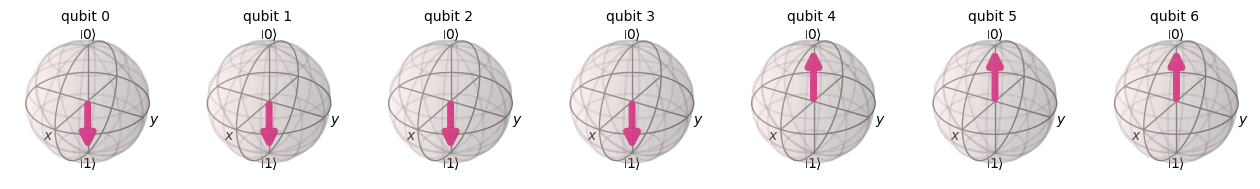

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     ├───┤      │                               │                ┌───┐ │P(π/2) »
q_1: ┤ X ├──────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
     ├───┤      │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ┤ X ├──────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ├───┤┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
q_4: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
q_5: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
q_6: ──────────────────────────────────────────────────────────────────────────»
                                                                               »
«     ┌───┐   
«q_0: ┤ H ├─X─
«     └───┘ │ 
«q_1: ──X───┼─
«       │   │ 
«q_2: ──X───┼─
«           │ 
«q_3: ──────X─
«             
«q_4: ────────
«             
«q_5: ────────
«             
«q_6: ────────
«

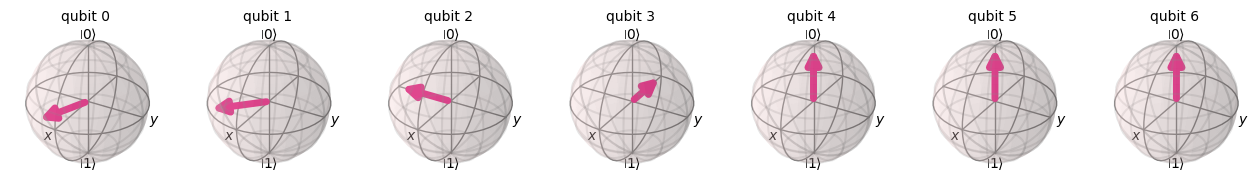

In [40]:
### n-qubit QFT ###
# Hadamard e rotações controladas
def qft_rotations(circuit, n):
    # Circuito vazio
    if n == 0:
        return circuit
    
    # Inicia no qubit mais significativo
    n -= 1
    
    # Aplica Hadamard
    circuit.h(n)
    
    # Aplica as rotações controladas pelos qubits de menor índice
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
        
    # Executa recursivamente para os demais qubits
    qft_rotations(circuit, n)

    
# Troca os estados dos qubits 
# (pra bater com a definição matemática, pois o Qiskit é little-endian)
def swap_qubits(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


# Cria o circuito QFT para n qubits
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_qubits(circuit, n)
    return circuit

### 4-qubit QFT ###
qc = QuantumCircuit(7)
qft(qc,7)
display(qc.draw())

### 3-qubit QFT para o estado |111> ###
# Cria o circuito
qc = QuantumCircuit(7)

# Codifica o estado |111> (0b111)
qc.x(range(4))
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Aplica QFT
qft(qc,4)
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (depois)
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
plot_bloch_multivector(statevector)

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/1300326732.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


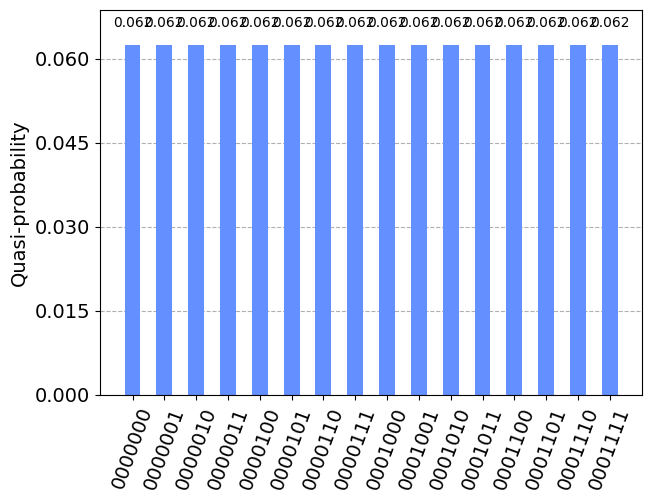

In [41]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc_sv, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘

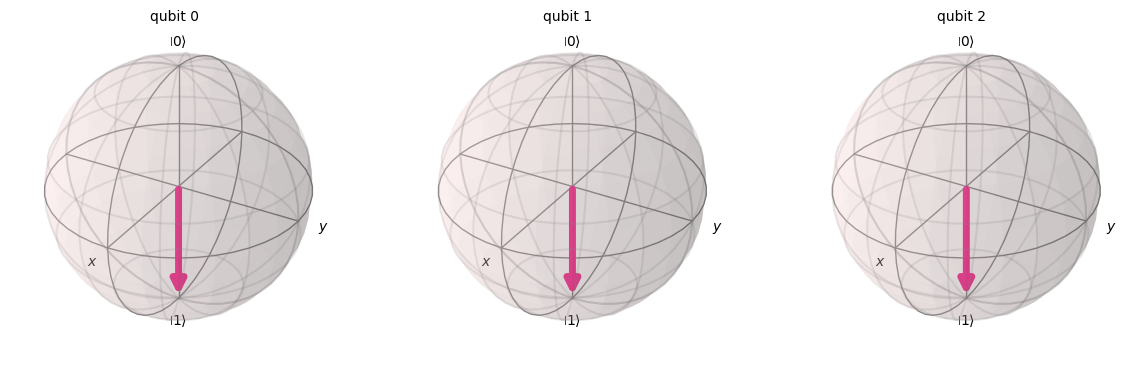

┌───┐                                     ┌───┐   
q_0: ┤ X ├──────■──────────────────────■───────┤ H ├─X─
     ├───┤      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ X ├──────┼────────■───────┤ H ├─■─────────────┼─
     ├───┤┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘

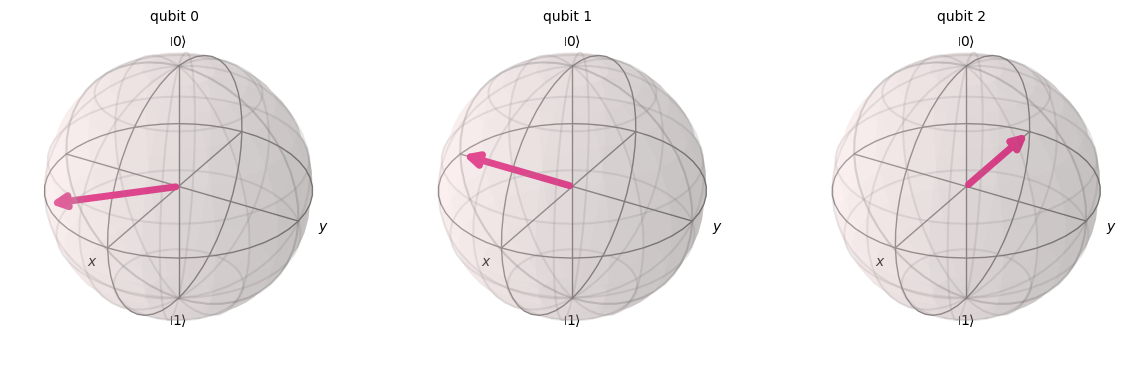

In [42]:
### n-qubit QFT ###
# Hadamard e rotações controladas
def qft_rotations(circuit, n):
    # Circuito vazio
    if n == 0:
        return circuit
    
    # Inicia no qubit mais significativo
    n -= 1
    
    # Aplica Hadamard
    circuit.h(n)
    
    # Aplica as rotações controladas pelos qubits de menor índice
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
        
    # Executa recursivamente para os demais qubits
    qft_rotations(circuit, n)

    
# Troca os estados dos qubits 
# (pra bater com a definição matemática, pois o Qiskit é little-endian)
def swap_qubits(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


# Cria o circuito QFT para n qubits
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_qubits(circuit, n)
    return circuit

### 4-qubit QFT ###
qc = QuantumCircuit(3)
qft(qc,3)
display(qc.draw())

### 3-qubit QFT para o estado |111> ###
# Cria o circuito
qc = QuantumCircuit(3)

# Codifica o estado |111> (0b111)
qc.x(range(3))
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Aplica QFT
qft(qc,3)
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (depois)
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
plot_bloch_multivector(statevector)

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(7π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(7π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(7π) ├─
     └───┘ └───────┘

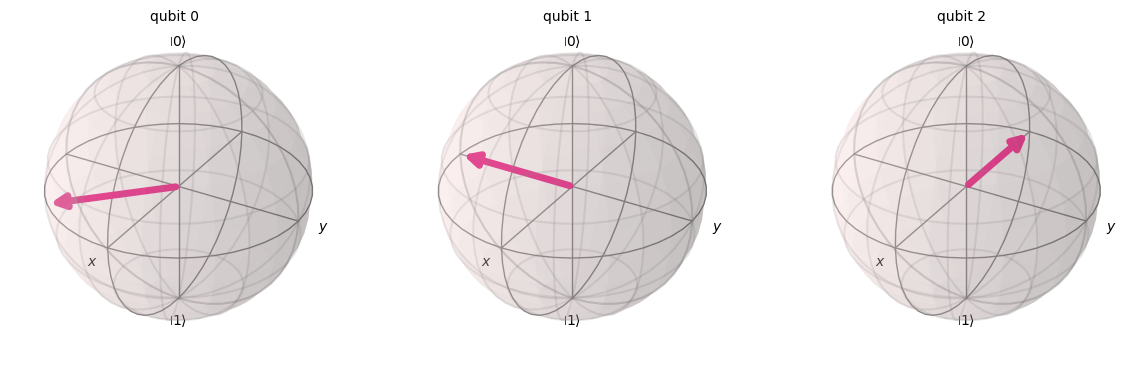

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,7π/4) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,7π/2) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,7π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

In [43]:
# O hardware quântico real realiza medições na base Z, então
# se executarmos QFT nele, teremos apenas uma distribuição aleatória (medidas na base X)
# Para podermos testar, construídos um estado na base de Fourier e então
# invertemos o circuito, verificando que o hardware fornece o resultado
# esperado em termos de probabilidades (amplificando para o estado da base
# computacional correspondente).

def inverse_qft(circuit, n):
    # Cria o circuito para QFT
    qft_c = qft(QuantumCircuit(n), n)
    
    # Inverte o circuito
    invqft_c = qft_c.inverse()
    
    # Adiciona no circuito geral
    circuit.append(invqft_c, circuit.qubits[:n])
    
    # Removendo decompose() teremos apenas uma caixa preta
    return circuit.decompose()

# Número de qubits para realizar a contagem
nqubits = 3

# Número a ser codificado
number = 7

# Cria o circuito
qc = QuantumCircuit(nqubits)

# Cria o estado na base de Fourier correspondente ao estado da base computacional |111>
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Inverte o circuito QFT
qc = inverse_qft(qc, nqubits)
qc.measure_all()
display(qc.draw())

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/230403493.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


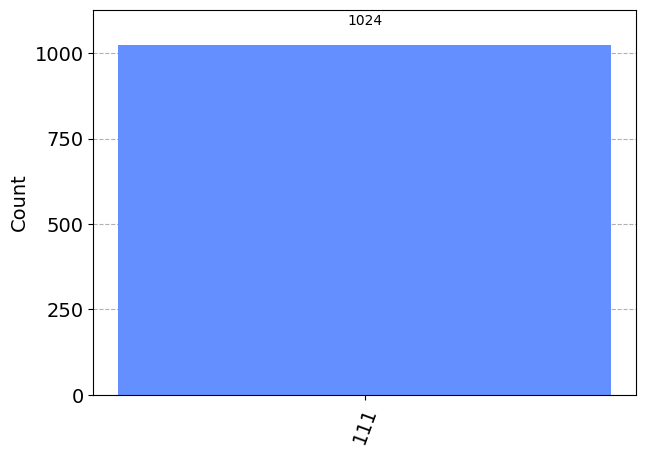

In [44]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(9π/2) ├
     ├───┤└┬───────┬┘
q_1: ┤ H ├─┤ P(9π) ├─
     ├───┤ ├───────┴┐
q_2: ┤ H ├─┤ P(18π) ├
     ├───┤ └────────┘
q_3: ┤ H ├───────────
     └───┘

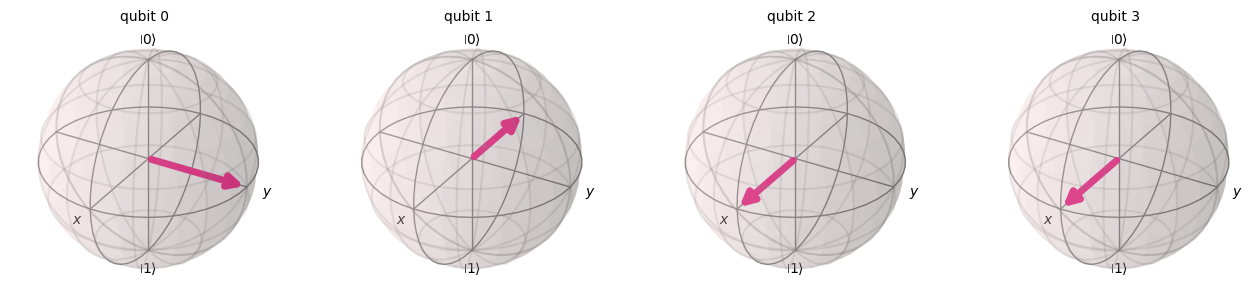

┌─────────┐┌─────────────┐      ┌───┐                         »
   q_0: ┤ U2(0,π) ├┤ U(0,0,9π/2) ├────X─┤ H ├─■───────────────────────»
        ├─────────┤└┬───────────┬┘    │ └───┘ │P(-π/2) ┌───┐          »
   q_1: ┤ U2(0,π) ├─┤ U(0,0,9π) ├──X──┼───────■────────┤ H ├─■────────»
        ├─────────┤ ├───────────┴┐ │  │                └───┘ │P(-π/2) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,18π) ├─X──┼──────────────────────■────────»
        ├─────────┤ └────────────┘    │                               »
   q_3: ┤ U2(0,π) ├───────────────────X───────────────────────────────»
        └─────────┘                                                   »
meas: 4/══════════════════════════════════════════════════════════════»
                                                                      »
«                                                           ░ ┌─┐         
«   q_0: ─■──────────────────────────────────■──────────────░─┤M├─────────
«         │                                  │              ░ └╥┘┌─┐      
«   q_1: ─┼────────────────────────■─────────┼──────────────░──╫─┤M├──────
«         │P(-π/4) ┌───┐           │         │              ░  ║ └╥┘┌─┐   
«   q_2: ─■────────┤ H ├─■─────────┼─────────┼──────────────░──╫──╫─┤M├───
«                  └───┘ │P(-π/2)  │P(-π/4)  │P(-π/8) ┌───┐ ░  ║  ║ └╥┘┌─┐
«   q_3: ────────────────■─────────■─────────■────────┤ H ├─░──╫──╫──╫─┤M├
«                                                     └───┘ ░  ║  ║  ║ └╥┘
«meas: 4/══════════════════════════════════════════════════════╩══╩══╩══╩═
«                                                              0  1  2  3

In [45]:
# O hardware quântico real realiza medições na base Z, então
# se executarmos QFT nele, teremos apenas uma distribuição aleatória (medidas na base X)
# Para podermos testar, construídos um estado na base de Fourier e então
# invertemos o circuito, verificando que o hardware fornece o resultado
# esperado em termos de probabilidades (amplificando para o estado da base
# computacional correspondente).

def inverse_qft(circuit, n):
    # Cria o circuito para QFT
    qft_c = qft(QuantumCircuit(n), n)
    
    # Inverte o circuito
    invqft_c = qft_c.inverse()
    
    # Adiciona no circuito geral
    circuit.append(invqft_c, circuit.qubits[:n])
    
    # Removendo decompose() teremos apenas uma caixa preta
    return circuit.decompose()

# Número de qubits para realizar a contagem
nqubits = 4

# Número a ser codificado
number = 18

# Cria o circuito
qc = QuantumCircuit(nqubits)

# Cria o estado na base de Fourier correspondente ao estado da base computacional |111>
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Inverte o circuito QFT
qc = inverse_qft(qc, nqubits)
qc.measure_all()
display(qc.draw())

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/230403493.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


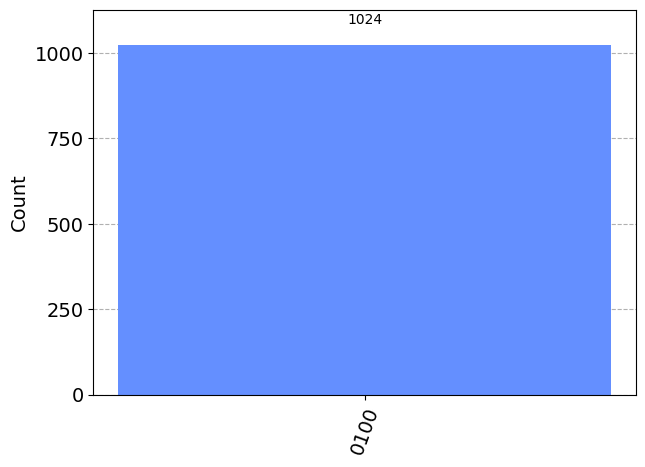

In [46]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

## 16P) Modifique o circuito QPE para a porta T dado em aula para utilizar um contador de 4 qubits e estime a fase de uma porta com θ = 1/6. Explicite todas as rotações realizadas para a parte do QPE (não utilize recursão ou loops; para economizar tempo, utilize a função qft_dagger para a parte final do circuito). Apresente o diagrama de circuito e os resultados com simulador, calculando a estimativa e o erro. Quantos qubits o contador deve ter para termos um erro menor que 1% na estimativa?

In [47]:

# Para converter da base de Fourier para a base computacional
def qft_dagger(qc, n):
    
    # Troca os estados dos qubits (Qiskit é little-endian)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)   
        
    # Aplica as rotações controladas em torno do eixo Z    
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
        

┌───┐                                                                ░    ┌───┐                                         ░ ┌─┐      
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
     ├───┤ │                                                              ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
     ├───┤ │        │        │                                            ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
     ├───┤ │P(π/6)  │P(π/6)  │P(π/6)  │P(π/6)  │P(π/6)  │P(π/6)  │P(π/6)  ░                                            └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░──────────────────────────────────────────────────░──╫──╫──╫─
     └───┘                                                                ░                                                  ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/489776881.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


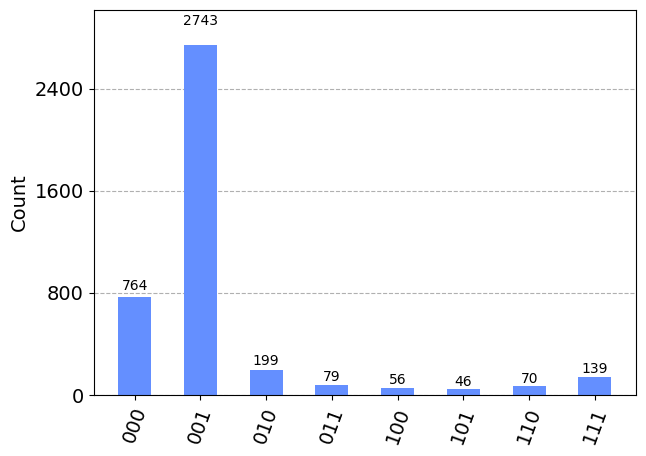

In [48]:
### Exemplo para porta com Theta = 1/3 ###
# Cria o circuito com 3 qubits como contador e 1 qubit como autoestado
qpe2 = QuantumCircuit(4, 3)

# Aplica Hadamard aos qubits do contador
for qubit in range(3):
    qpe2.h(qubit)

# Coloca o autoestado em |1>
qpe2.x(3)

# Aplica as rotações controladas em torno do eixo Z
angle = math.pi/6
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe2, 3)

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Inclui as medições para os qubits do contador
for n in range(3):
    qpe2.measure(n,n)

# Desenha o circuito
display(qpe2.draw(fold=-1))

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
plot_histogram(answer)

In [49]:
erro = 1/pow(2,5)*100
print("erro percentual " + str(erro))

erro percentual 3.125


In [50]:
erro = 1/pow(2,7)*100
print("erro percentual " + str(erro) + " menor do que 1 para 7 qubits.")

erro percentual 0.78125 menor do que 1 para 7 qubits.


┌───┐                                                                ░    ┌───┐                                         ░ ┌─┐      
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
     ├───┤ │                                                              ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
     ├───┤ │        │        │                                            ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  ░                                            └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░──────────────────────────────────────────────────░──╫──╫──╫─
     └───┘                                                                ░                                                  ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/2954858926.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


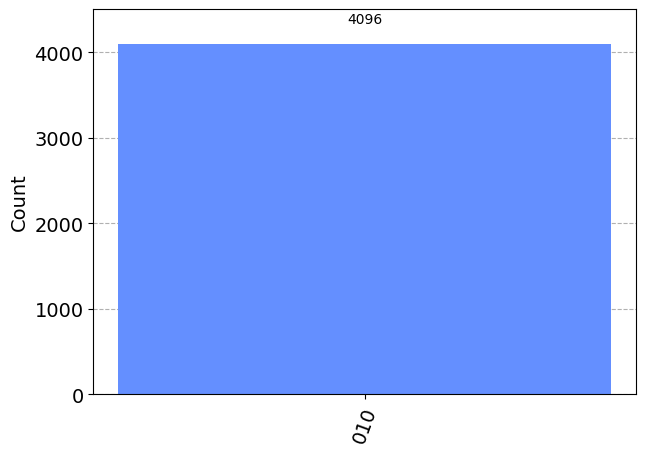

In [51]:
### Exemplo para porta com Theta = 1/3 ###
# Cria o circuito com 3 qubits como contador e 1 qubit como autoestado
qpe2 = QuantumCircuit(4, 3)

# Aplica Hadamard aos qubits do contador
for qubit in range(3):
    qpe2.h(qubit)

# Coloca o autoestado em |1>
qpe2.x(3)

# Aplica as rotações controladas em torno do eixo Z
angle = math.pi/2
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe2, 3)

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Inclui as medições para os qubits do contador
for n in range(3):
    qpe2.measure(n,n)

# Desenha o circuito
display(qpe2.draw(fold=-1))

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
plot_histogram(answer)

┌───┐                                                                ░    ┌───┐                                         ░ ┌─┐      
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─┤ H ├─■──────────────■────────────────────────░─┤M├──────
     ├───┤ │                                                              ░  │ └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼───────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
     ├───┤ │        │        │                                            ░  │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X──────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░                                            └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░──────────────────────────────────────────────────░──╫──╫──╫─
     └───┘                                                                ░                                                  ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_17403/676920817.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


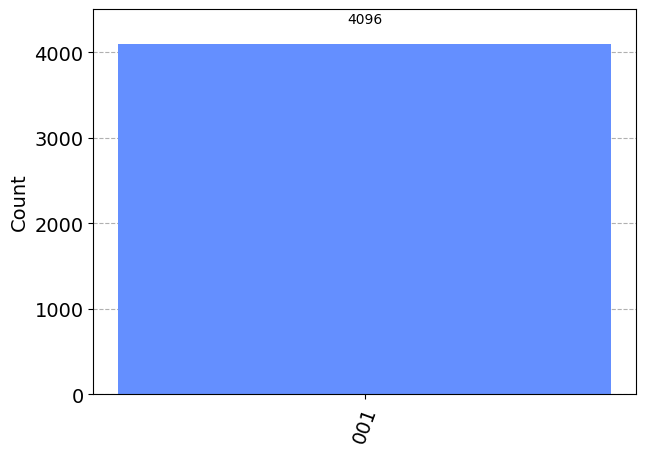

In [52]:
### Exemplo para porta com Theta = 1/3 ###
# Cria o circuito com 3 qubits como contador e 1 qubit como autoestado
qpe2 = QuantumCircuit(4, 3)

# Aplica Hadamard aos qubits do contador
for qubit in range(3):
    qpe2.h(qubit)

# Coloca o autoestado em |1>
qpe2.x(3)

# Aplica as rotações controladas em torno do eixo Z
angle = math.pi/4
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Aplica QFT dagger nos qubits do contador
qft_dagger(qpe2, 3)

# Aplica uma barreira para facilitar a visualização
qpe2.barrier()

# Inclui as medições para os qubits do contador
for n in range(3):
    qpe2.measure(n,n)

# Desenha o circuito
display(qpe2.draw(fold=-1))

# Executa no simulador
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()

# Plota os resultados
answer = results.get_counts()
plot_histogram(answer)

In [53]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    qc.z(0)
    qc.x(0)
    return qc

def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc



def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc



In [54]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐┌───┐┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├┤ Z ├┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘└───┘└───┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■─────────────░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘                ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1

{'01': 1024}


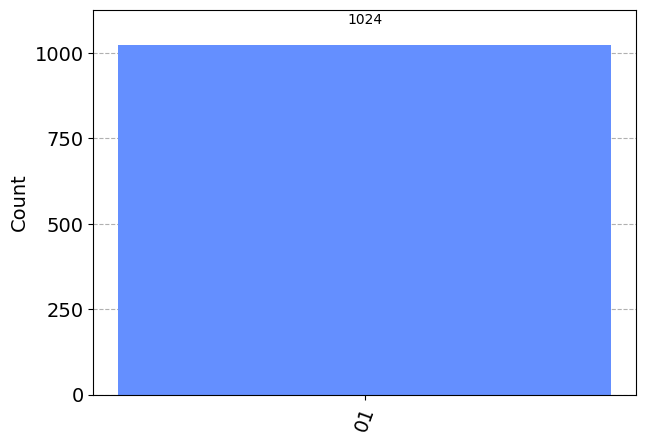

In [55]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## 19P) Explique as diferenças entre a codificação superdensa e o teletransporte quântico. Alice quer enviar dois bits clássicos para Bob utilizando um circuito quântico. Implemente este circuito para o protocolo da codificação superdensa utilizando o estado de Bell (1/√2) ∗ (|00⟩ − |11⟩) como par de qubits emaranhados. Quais portas quânticas Alice deve aplicar no seu qubit para transmitir a mensagem 10? Execute o circuito completo para a mensagem 11, apresentando o diagrama de circuito e os resultados para o simulador e para o hardware quântico real.

O teletransporte quantico, permite a transmissão de informações de forma segura através da transmissão de estados quânticos. E uma caracteristica intrinseca a sistemas quanticos. Onde um estado quantico é transmitido à outro qubit a uma distância muito grande. Essa característica é a base para desenvolimento de sistemas de codificação superdensa. O objetivo é enviar o estado de um qubit de uma origem para um destino com segurança, isto é, de forma que se a comunicação for interceptada não será possível determinar o estado enviado.
A codificacao, como o nome sugere, consiste em transformar uma mensagem em codigo que deve ser transmitido com seguranca ate o receptor. No fim, deve ser decodificado e o conteudo da mensagem, preservado. 

In [56]:
def create_bell_pair2():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.z(0)
    qc.cx(1, 0)
    return qc

def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc



def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc



In [57]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair2()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ┤ Z ├┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ├───┤└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

{'10': 1024}


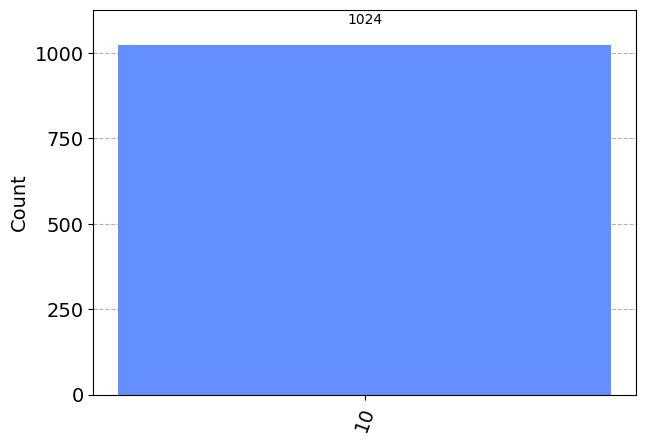

In [58]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)